# Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

The wine quality data set typically includes features related to the chemical composition of wines, such as acidity, pH, alcohol content, residual sugar, and more. These features are important in predicting wine quality as they directly influence the taste, aroma, and overall sensory experience of the wine. Different chemical compounds contribute to different aspects of wine quality, making these features critical for predictive modeling.

# Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.

Common imputation techniques include mean/median imputation, forward/backward fill, and interpolation. Each has advantages (easy to implement, doesn't distort the distribution much) and disadvantages (ignores relationships, can introduce bias). The choice depends on the nature of the data and the extent of missingness.

# Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

Factors include study habits, attendance, socioeconomic background, teacher quality, etc. Statistical techniques could involve correlation analysis, regression, and hypothesis testing to identify significant factors. Multiple linear regression could help quantify the impact of different factors on performance.

# Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?

This would involve selecting relevant variables (such as study time, parental education, etc.) and transforming them if needed (categorizing, scaling). Feature engineering aims to enhance the model's predictive power by providing meaningful input features.

# Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?


<Figure size 864x576 with 0 Axes>

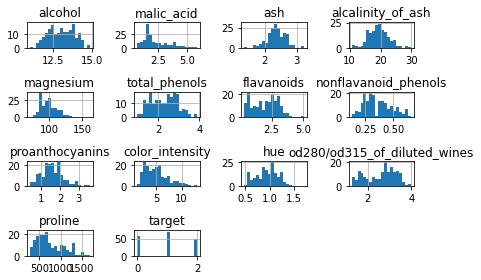

Skewness of features:
alcohol                        -0.051047
malic_acid                      1.030869
ash                            -0.175207
alcalinity_of_ash               0.211247
magnesium                       1.088915
total_phenols                   0.085907
flavanoids                      0.025129
nonflavanoid_phenols            0.446349
proanthocyanins                 0.512769
color_intensity                 0.861248
hue                             0.020913
od280/od315_of_diluted_wines   -0.304690
proline                         0.761336
dtype: float64


<Figure size 864x576 with 0 Axes>

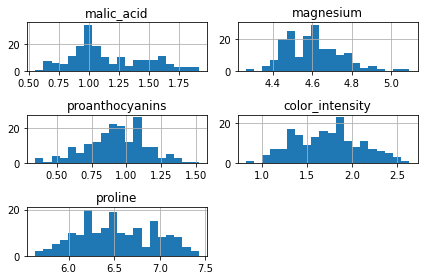

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.datasets import load_wine

# Load the wine quality data set
wine_data = load_wine()
wine_df = pd.DataFrame(data=np.c_[wine_data['data'], wine_data['target']],
                        columns=wine_data['feature_names'] + ['target'])

# Plot histograms of each feature
plt.figure(figsize=(12, 8))
wine_df.hist(bins=20)
plt.tight_layout()
plt.show()

# Check skewness of each feature
skewness = wine_df.drop(columns=['target']).apply(skew)
print("Skewness of features:")
print(skewness)

# Apply transformations to improve normality
# Example: Applying logarithm transformation to features with high skewness
skewed_features = skewness[abs(skewness) > 0.5].index
wine_df[skewed_features] = np.log1p(wine_df[skewed_features])

# Plot histograms of transformed features
plt.figure(figsize=(12, 8))
wine_df[skewed_features].hist(bins=20)
plt.tight_layout()
plt.show()


# Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separate features and target
X = wine_df.drop(columns=['target'])
y = wine_df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Find the minimum number of components for 90% variance
num_components_90var = np.argmax(cumulative_explained_variance >= 0.9) + 1

print("Explained Variance Ratio for each component:")
print(explained_variance_ratio)
print("Cumulative Explained Variance Ratio:")
print(cumulative_explained_variance)
print("Minimum components for 90% variance:", num_components_90var)


Explained Variance Ratio for each component:
[0.35460706 0.20560351 0.11351175 0.07039886 0.06282418 0.04534284
 0.03988521 0.02775954 0.02379048 0.01918625 0.01726515 0.01221761
 0.00760756]
Cumulative Explained Variance Ratio:
[0.35460706 0.56021057 0.67372232 0.74412118 0.80694536 0.8522882
 0.89217341 0.91993295 0.94372343 0.96290968 0.98017484 0.99239244
 1.        ]
Minimum components for 90% variance: 8
